In [1]:
import bisect
import math
import matplotlib.pyplot as plt
from util import filetools
from util import unpack
from util import plotter
from util import vectors
import pandas as pd
import glob
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
def get_outfile(datadir):
    
    return glob.glob(datadir + '/*.out')[0]

In [3]:
datadir = '/home/erubin/thesis/gpfs/experiments/test1k-mcluster-diffi-11-11-16:51:34//'

In [4]:
confs = filetools.get_conf_files(datadir)

In [5]:
df = unpack.DataFile(confs[0]).unpack()

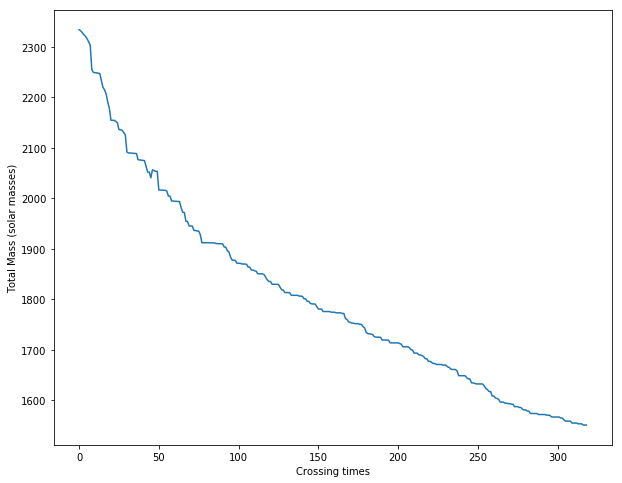

In [6]:
plotter.mass_v_time(datadir)

In [7]:
plotter.avg_ke_v_time(data_dir=datadir)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [7]:
def cumulative_density_profile(datadir, t=0, target=float('inf')):
    initial = filetools.get_conf_files(datadir)[t]
    df = unpack.DataFile(initial).unpack()
    radii = vectors.magnitudes3(df.pos)
    massRad = sorted(list(zip(radii, df.masses)))
    last = bisect.bisect(massRad, (target, 0))
    rad = [pair[0] for pair in massRad[:last]]
    cumMass = [pair[1] for pair in massRad[:last]]
    for i in xrange(1, len(cumMass)):
        cumMass[i] = cumMass[i] + cumMass[i-1]
        
    fig, ax = plt.subplots(1,1)
    ax.loglog(rad, cumMass)
    mtot = "{} solar masses".format(cumMass[-1]*df.to_solar_mass)    
    print "{} stars constituting {} within {} pc of center".format(last, mtot, target)

    

def density_profile(datair, t=0, target=35):
    initial = filetools.get_conf_files(datadir)[t]
    df = unpack.DataFile(initial).unpack()
    radii = vectors.magnitudes3(df.pos)
    massRad = sorted(list(zip(radii, df.masses)))
    last = bisect.bisect(massRad, (target, 0))
    rad = [pair[0] for pair in massRad[:last]]
    cumMass = [pair[1]*df.to_solar_mass for pair in massRad[:last]]
    density = [0 for _ in xrange(0, len(rad))]
    for i in xrange(1, len(cumMass)):
        cumMass[i] = cumMass[i] + cumMass[i-1]
    
    for i in xrange(1, len(cumMass)):
        density[i] = 3.0 * cumMass[i] / (4 * math.pi * rad[i]**3) 
    fig, ax = plt.subplots(1,1)

    plt.loglog(rad, density)    


896 stars constituting 2079.23198525 solar masses within 5 pc of center
534 stars constituting 1161.67547782 solar masses within 5 pc of center


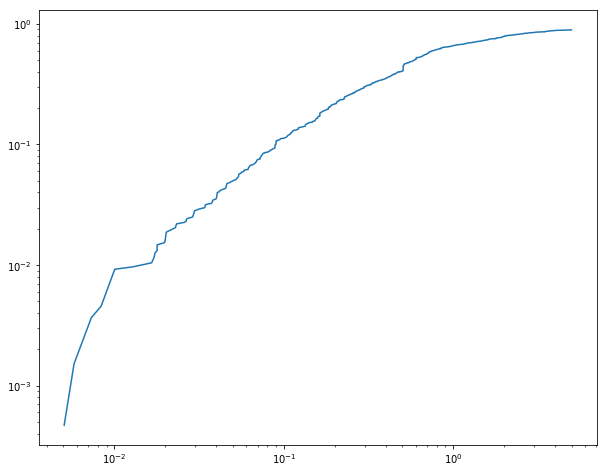

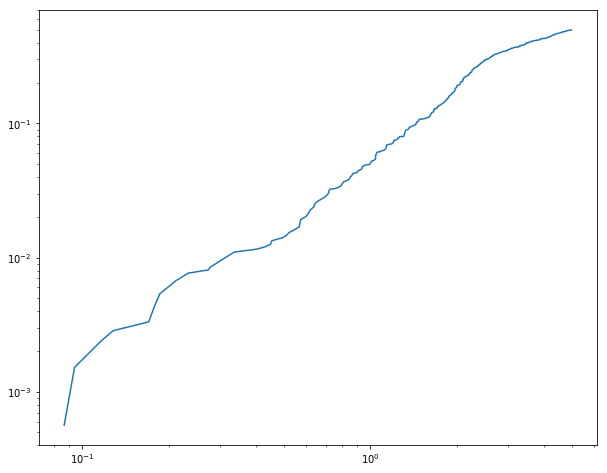

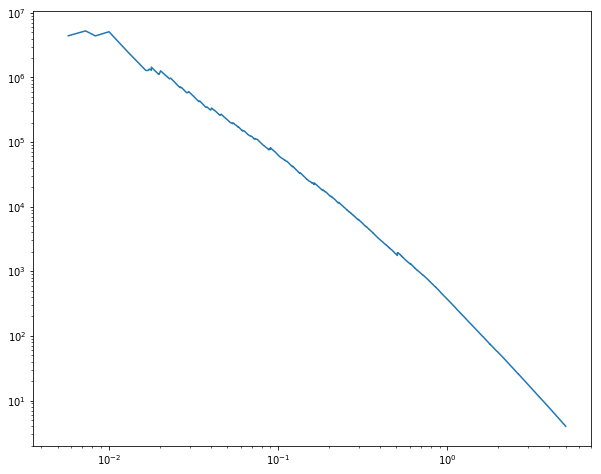

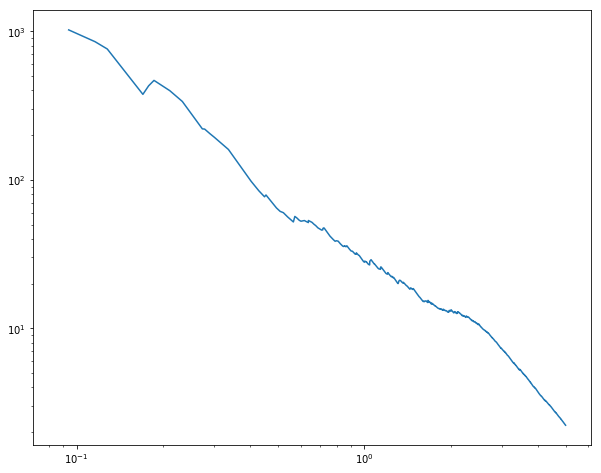

In [51]:
cumulative_density_profile(datadir, t=0, target=5)
cumulative_density_profile(datadir, t=90, target=5)

density_profile(datadir, t=0, target=5)
density_profile(datadir, t=90, target=5)

In [8]:
def mass_within_v_time(datadir, radius=0.001):
    
    masses = []
    times = []
    for conf in filetools.get_conf_files(datadir):
        df = unpack.DataFile(conf).unpack()
        radii = vectors.magnitudes3(df.pos)
        massRad = sorted(list(zip(radii, df.masses)))
        last = bisect.bisect(massRad, (radius, 0))
        rad = [pair[0] for pair in massRad[:last]]
        cumMass = [pair[1] for pair in massRad[:last]]
        for i in xrange(1, len(cumMass)):
            cumMass[i] = cumMass[i] + cumMass[i-1]
            
        masses.append(cumMass[-1]*df.to_solar_mass)
        times.append(df.header2['time[nb]'] * df.to_myr)
        
    
    fig, ax = plt.subplots(1,1)
    ax.plot(times, masses)
    

In [9]:
def half_mass_radius(datadir):
    rads = []
    times = []
    for conf in filetools.get_conf_files(datadir):
        df = unpack.DataFile(conf).unpack()
        radii = vectors.magnitudes3(df.pos)
        massRad = sorted(list(zip(radii, df.masses)))
        cumMass = [pair[1] for pair in massRad]
        for i in xrange(1, len(cumMass)):
            cumMass[i] = cumMass[i] + cumMass[i-1]
            
        halfmass = cumMass[-1]/2.
        halfMi = bisect.bisect(cumMass, halfmass)
        halfR = massRad[halfMi][0]
        rads.append(halfR * df.to_parsecs)
        times.append(df.header2['time[nb]'])
        
    
    fig, ax = plt.subplots(1,1)
    ax.plot(times, rads)    

In [10]:
def g30_core_radius(datadir):
    globs = datadir+'/global.30'
    df = pd.read_csv(globs, sep='\s+', index_col=False)
    cores = df['RC[PC]']
    times = df['TIME[NB}']
    fig, ax = plt.subplots(1,1)
    ax.plot(times, cores)
    

def g30_half_mass_radius(datadir):
    globs = datadir+'/global.30'
    df = pd.read_csv(globs, sep='\s+', index_col=False)
    hmrs = df['RSCALE[PC]']
    times = df['TIME[NB}']
    fig, ax = plt.subplots(1,1)
    ax.plot(times, hmrs)    

In [12]:
# def potential_energy(datadir):
#     out = get_outfile(datadir)
    
#     with open(out, 'r') as f:
        
#     times = df['TIME[NB}']
#     fig, ax = plt.subplots(1,1)
#     ax.plot(times, hmrs)    
    
def kinetic_energy(datadir):
    globs = datadir+'/global.30'
    df = pd.read_csv(globs, sep='\s+', index_col=False)
    hmrs = df['RSCALE[PC]']
    times = df['TIME[NB}']
    fig, ax = plt.subplots(1,1)
    ax.plot(times, hmrs)    

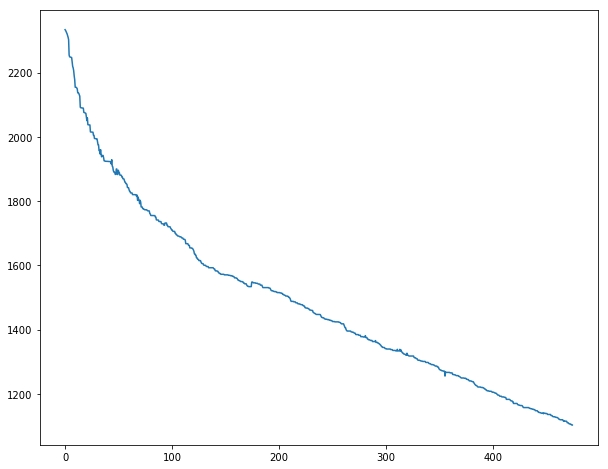

In [46]:
mass_within_v_time(datadir, radius=10000)

In [ ]:
half_mass_radius(datadir)

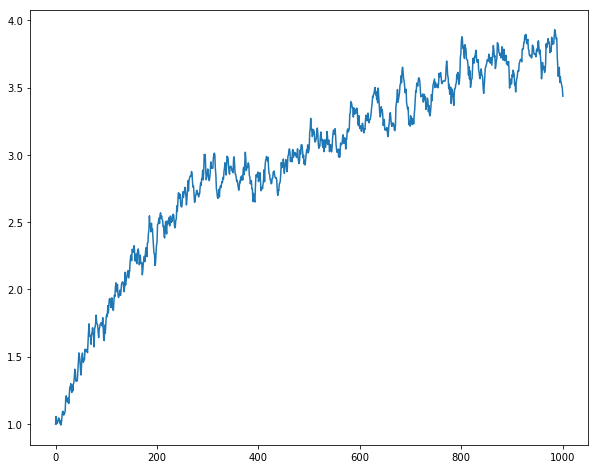

In [44]:
g30_half_mass_radius(datadir)

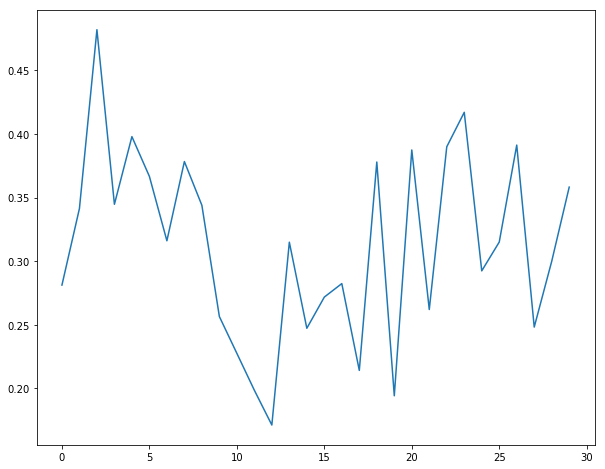

In [22]:
g30_core_radius(datadir)